# Proceso para machine learning

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Nota para continuar el trabajo.
Voy a generar un id unico para la película para que independientemente de la plataforma en la que lo haya visto, tengamos un catálogo único para después asociarlo al df de ratings y de esa manera dropear los repetidos de usario y pelicula para poder immplementar el modelo utilizado en la clase 6 del módulo 4

## Transformaciones

In [6]:
# Se extraen los archivos a utilizar con los ratings y el catálogo de los archivos
ratings = pd.read_parquet("datasets/ratings.parquet")

In [7]:
ratings.head()

,userId,rating,timestamp,movieId
0,1,1.0,1425941529,as680
1,1,4.5,1425942435,ns2186
2,1,5.0,1425941523,hs2381
3,1,5.0,1425941546,ns3663
4,1,5.0,1425941556,as9500


In [7]:
ratings.shape

(11024289, 4)

In [8]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11024289 entries, 0 to 11024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   rating     float64
 2   timestamp  int64  
 3   movieId    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 336.4+ MB


In [9]:
ratings.describe()

,userId,rating,timestamp
count,1.102429e+07,1.102429e+07,1.102429e+07
mean,8.997251e+04,3.533455e+00,1.172542e+09
std,8.686601e+04,1.059692e+00,2.056774e+08
min,1.000000e+00,5.000000e-01,7.896520e+08
25%,2.855800e+04,3.000000e+00,9.901593e+08
50%,5.684300e+04,3.500000e+00,1.153610e+09
75%,1.168670e+05,4.000000e+00,1.360470e+09
max,2.708960e+05,5.000000e+00,1.501827e+09


In [7]:
#Extraemos el dataset con la información de las peliculas

df = pd.read_csv("datasets/films.csv")

In [11]:
df.head()

,movieId,platform,type,title,director,cast,country,date_added,release_year,clasificacion,listed_in,description,duration_int,duration_type,rating
0,as1,amazon,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,113,min,3.5
1,as2,amazon,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,"drama, international",a metro family decides to fight a cyber crimin...,110,min,3.5
2,as3,amazon,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,"action, drama, suspense",after a man discovers his wife is cheating on ...,74,min,3.5
3,as4,amazon,movie,pink: staying true,sonia anderson,"interviews with: pink, adele, beyoncé, britney...",united states,2021-03-30,2014,g,documentary,"pink breaks the mold once again, bringing her ...",69,min,3.5
4,as5,amazon,movie,monster maker,giles foster,"harry dean stanton, kieran o'brien, george cos...",united kingdom,2021-03-30,1989,g,"drama, fantasy",teenage matt banting wants to work with a famo...,45,min,3.5


In [8]:
#Creamos un df como catálogo de peliculas en el que solo tendremos el id de la pelicula y el título.

titulos = df.loc[:, ["movieId", "title"]]
titulos.head()

,movieId,title
0,as1,the grand seduction
1,as2,take care good night
2,as3,secrets of deception
3,as4,pink: staying true
4,as5,monster maker


In [9]:
# Generamos un nuevo id de la pelicula unico, para que independientemente de la plataforma en la que se haya calificado se considere un solo titulo.

titulos["IdMovie"]= pd.factorize(titulos["title"])[0]
titulos

,movieId,title,IdMovie
0,as1,the grand seduction,0
1,as2,take care good night,1
2,as3,secrets of deception,2
3,as4,pink: staying true,3
4,as5,monster maker,4
...,...,...,...
22993,ns8803,zodiac,22037
22994,ns8804,zombie dumb,22038
22995,ns8805,zombieland,22039
22996,ns8806,zoom,22040


In [13]:
#Para no iniciar con un Id en 0, modificamos al valor siguiente del último
titulos.loc[titulos["IdMovie"]== 22042]

,movieId,title,IdMovie
0,as1,the grand seduction,22042


In [11]:
titulos.iloc[0,2] = 22042

In [12]:
titulos.head()

,movieId,title,IdMovie
0,as1,the grand seduction,22042
1,as2,take care good night,1
2,as3,secrets of deception,2
3,as4,pink: staying true,3
4,as5,monster maker,4


In [14]:
# Unimos el data de rating con el de las plataformas para tener un numero unico de ID en las películas.
df_ratings = pd.merge(ratings,titulos, on="movieId")

In [18]:
#Comprobamos la unión
df_ratings

,userId,rating,timestamp,movieId,title,IdMovie
0,1,1.0,1425941529,as680,the english civil war,679
1,583,4.5,1112982383,as680,the english civil war,679
2,765,5.0,889677014,as680,the english civil war,679
3,2116,3.0,836264839,as680,the english civil war,679
4,2143,3.0,1435067487,as680,the english civil war,679
...,...,...,...,...,...,...
11024284,123652,3.0,1203946171,ns720,power rangers dino fury,14555
11024285,123831,3.5,1462993494,ns720,power rangers dino fury,14555
11024286,123886,3.5,1497537507,ns720,power rangers dino fury,14555
11024287,123923,3.5,1200968487,ns720,power rangers dino fury,14555


In [15]:
#Una vez realizada la combinación podemo proceder a tener nuestro catálogo de peliculas con Id unico
titulos = titulos[["IdMovie","title"]]
titulos.head()

,IdMovie,title
0,22042,the grand seduction
1,1,take care good night
2,2,secrets of deception
3,3,pink: staying true
4,4,monster maker


In [16]:
#Eliminamos las columnas timestamp, movieId y title para dejar más limpio el dataset
df_ratings = df_ratings[["userId", "IdMovie","rating"]]
df_ratings

,userId,IdMovie,rating
0,1,679,1.0
1,583,679,4.5
2,765,679,5.0
3,2116,679,3.0
4,2143,679,3.0
...,...,...,...
11024284,123652,14555,3.0
11024285,123831,14555,3.5
11024286,123886,14555,3.5
11024287,123923,14555,3.5


Se observa que se encuentran 31192 regstros duplicados, ya que se puede deber a que un mismo usuario puntuó la misma película en diferentes plataformas, por lo que podemos proceder a eliminarlas.

In [17]:
df_ratings.duplicated().sum()

31192

In [18]:
df_ratings = df_ratings.drop_duplicates()

In [19]:
df_ratings.shape

(10993097, 3)

In [20]:
#Guardamos los archivos para referencias
df_ratings.to_csv('datasets/ratings_ml.csv', index=False)
titulos.to_csv('datasets/titulos.csv', index=False)

Hasta aquí contamos con 
* Un dataset (df_rating) con el id de usuario, idmovie unico y la puntuación dada por el usuario.
* Un dataset (titles) que será el catálogo de películas con id unico de pelicula.

## EDA

Ahora realizaremos el analisis de esta información (EDA)

In [26]:
#Identificamos el tamaño del df
print(df_ratings.shape)
df_ratings.head()

(10993097, 3)


,userId,IdMovie,rating
0,1,679,1.0
1,583,679,4.5
2,765,679,5.0
3,2116,679,3.0
4,2143,679,3.0


In [27]:
#Identificamos el tipo de dato de las columnas
df_ratings.dtypes

userId       int64
IdMovie      int64
rating     float64
dtype: object

In [28]:
#Usuarios unicos
print(len(df_ratings["userId"].unique()))

115077


In [29]:
# Calificaciones por usuario
rating_por_usuario = df_ratings.groupby(["userId"]).count()
rating_por_usuario.head()

,IdMovie,rating
userId,,
1,27,27
2,22,22
3,10,10
4,62,62
5,26,26


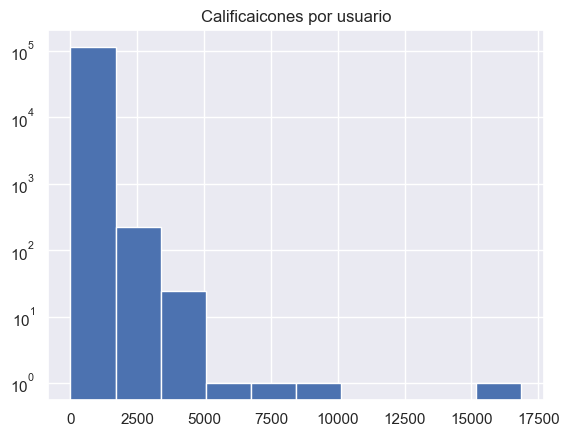

In [30]:
#Graficamos la distribución del agrupamiento anterior
plt.hist(rating_por_usuario.rating, log=True)
plt.title("Calificaicones por usuario")
plt.show()

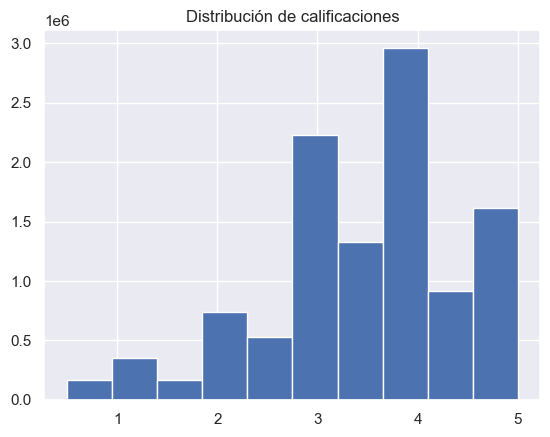

In [31]:
#Mostramos la distribución por calificaciones
df_ratings["rating"].hist()
plt.title("Distribución de calificaciones")
plt.show()

Identificamos la pelicula con más calificaciones y la que menos tiene.

In [32]:
#Generamos el DF de los ratings agrupado por id de la pelicual 
rating_por_peli = df_ratings.groupby(["IdMovie"]).count()
rating_por_peli.head()

,userId,rating
IdMovie,,
1,491,491
2,420,420
3,471,471
4,476,476
5,461,461


In [33]:
#Identificamos el índice en el que se encuentra el valor máximo del idUsuario
max_id = rating_por_peli["userId"].idxmax()
print(titulos.loc[max_id].title)

married by christmas


In [34]:
#Hacemos lo mismo que en el aterior, pero ahora con el minimo
min_id = rating_por_peli["userId"].idxmin()
print(titulos.loc[min_id].title)

ninja robots season 1


Identificamos las peliculas por popularidad

In [35]:
popular_movie = df_ratings.groupby(["IdMovie"]).count()
popular_movie.sort_values("userId",ascending=False, inplace=True)
popular_movie['Vistas'] = popular_movie['userId']
popular_movie.drop(columns= ["userId","rating"], inplace=True)
popular_movie.head()


,Vistas
IdMovie,
1729,1917
1639,1510
10196,1490
6287,1475
3288,1473


In [36]:
popular_movie["titulo"] = titulos.loc[popular_movie.index].title

In [37]:
popular_movie.head()

,Vistas,titulo
IdMovie,,
1729,1917,married by christmas
1639,1510,mom behind the wheel
10196,1490,it's a dog's life with bill farmer
6287,1475,amar shaheed bhagat singh
3288,1473,american daredevils


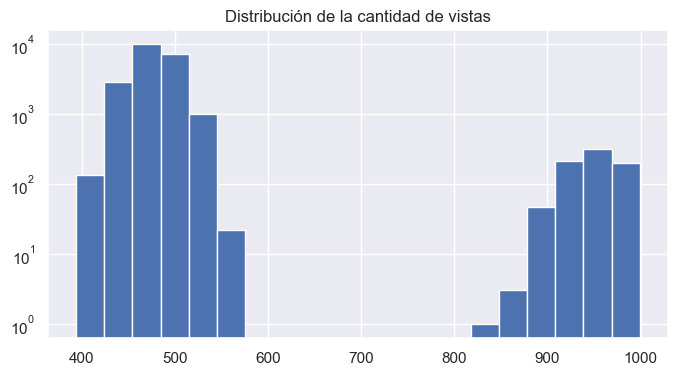

In [38]:
plt.figure(figsize=(8,4))
popular_movie.Vistas[popular_movie.Vistas<1000].hist(log=True,bins=20)
plt.title("Distribución de la cantidad de vistas")
plt.show()

En este caso no parece conveniente eliminar votaciones de las películas.

## Machine Learning

In [3]:
#Importamos las librerías que utilizaremos
import sys
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split

In [71]:
# Instanciamos la variable reader para poder leer el DF con esta librería (surprise)
reader = Reader()

In [70]:
df=pd.read_csv("datasets/ratings_ml.csv")

In [72]:
df_ratings = df.sort_values(by="userId", ascending=True)

In [73]:
df_ratings.head()

,userId,IdMovie,rating
0,1,679,1.0
10640,1,19185,5.0
10156,1,11888,5.0
9685,1,8889,2.5
9191,1,4333,5.0


In [74]:
titulos = pd.read_csv("datasets/titulos.csv")

In [40]:
titulos.head()

,IdMovie,title
0,22042,the grand seduction
1,1,take care good night
2,2,secrets of deception
3,3,pink: staying true
4,4,monster maker


In [75]:
# Cargamos nuestro DF (revisar si es necesario cambiar el orden de las columnas en comparación con la demo del M6)
df_ratings.head()

,userId,IdMovie,rating
0,1,679,1.0
10640,1,19185,5.0
10156,1,11888,5.0
9685,1,8889,2.5
9191,1,4333,5.0


In [101]:
num_filas= 100000

In [102]:
# Utilizamos dataset para poder leer nuestro DF con la librería surprise
data = Dataset.load_from_df(df_ratings[["userId","IdMovie","rating"]][:num_filas],reader)

In [103]:
# Separamos los datos para entrenamiento y para testeo
trainset, testset = train_test_split(data, test_size=.25)

In [104]:
#Usamos el model Singular Value Decomposition (SVD)
from surprise import SVD
model = SVD()

In [105]:
# Entrenamos el modelo
model.fit(trainset)

In [106]:
# Predecimos
prediction=model.test(testset)

In [107]:
prediction[1]

Prediction(uid=246, iid=11414, r_ui=3.5, est=3.268295179665168, details={'was_impossible': False})

In [108]:
# Hacemos una predicción al azar para usuario y pelicula
model.predict(156,786)

Prediction(uid=156, iid=786, r_ui=None, est=3.626827219982635, details={'was_impossible': False})

In [109]:
# Tomaremos un usuario para hacer la recomendación

usuario = 15
puntuacion = 4


In [110]:
df_usuario = df_ratings[(df_ratings['userId']==usuario)&(df_ratings['rating']>=puntuacion)]

In [111]:
df_usuario

,userId,IdMovie,rating
468167,15,15486,4.5
525000,15,16807,5.0
524513,15,15401,4.5
467667,15,6011,5.0
523545,15,1454,4.0
...,...,...,...
487847,15,12315,4.5
471491,15,7965,5.0
437939,15,4861,5.0
471977,15,13077,4.0


In [112]:
df_usuario = df_usuario.reset_index(drop=True)

In [113]:
df_usuario

,userId,IdMovie,rating
0,15,15486,4.5
1,15,16807,5.0
2,15,15401,4.5
3,15,6011,5.0
4,15,1454,4.0
...,...,...,...
135,15,12315,4.5
136,15,7965,5.0
137,15,4861,5.0
138,15,13077,4.0


In [114]:
df_usuario['Titulo'] = titulos['title'].loc[df_usuario.IdMovie].values

In [115]:
df_usuario

,userId,IdMovie,rating,Titulo
0,15,15486,4.5,eeb allay ooo!
1,15,16807,5.0,görümce
2,15,15401,4.5,love alarm
3,15,6011,5.0,gho gho rani
4,15,1454,4.0,nursery rhymes volume 4 by little baby bum
...,...,...,...,...
135,15,12315,4.5,library cheer
136,15,7965,5.0,murder in paradise
137,15,4861,5.0,15 minute forest stream meditation
138,15,13077,4.0,catherine the great


In [116]:
titulos.shape

(22998, 2)

In [117]:
# Copiamos los titulos en otra variable para que no se afecte el dataframe original de titulos
recomendaciones = titulos.copy()

In [118]:
#Extraemos las peliculas que ya ha visto.
usuario_vistas = df_ratings[df_ratings['userId']== usuario]
print(usuario_vistas.shape)
usuario_vistas.head()

(226, 3)


,userId,IdMovie,rating
468167,15,15486,4.5
458609,15,7044,1.0
450015,15,11560,3.0
525000,15,16807,5.0
524513,15,15401,4.5


In [119]:
#Eliminamos las que ya vio de las recomendaciones (los titulos)

recomendaciones.drop(usuario_vistas.IdMovie, inplace=True)
recomendaciones=recomendaciones.reset_index()
recomendaciones.head()

,index,IdMovie,title
0,0,22042,the grand seduction
1,1,1,take care good night
2,2,2,secrets of deception
3,3,3,pink: staying true
4,4,4,monster maker


In [120]:
#Realizamos las recomendaciones
recomendaciones['Puntaje_Estimado']=recomendaciones['IdMovie'].apply(lambda x: model.predict(usuario,x).est)

In [121]:
recomendaciones = recomendaciones.sort_values('Puntaje_Estimado', ascending = False)
print(recomendaciones.head(10))

       index  IdMovie                                      title  \
7851    7950     7939                                 girl chill   
21786  22012    21171                                    rahasya   
13242  13393    13173                              steins;gate 0   
5906    5974     5965                                  agneepath   
16729  16906     5965                                  agneepath   
6328    6404     6395                                biyer phool   
1655    1671     1670  mike birbiglia: my girlfriend's boyfriend   
16587  16762     1670  mike birbiglia: my girlfriend's boyfriend   
21649  21873    21043                                     ottaal   
15030  15193    14810                               tell me when   

       Puntaje_Estimado  
7851           4.670186  
21786          4.659104  
13242          4.590074  
5906           4.588327  
16729          4.588327  
6328           4.564685  
1655           4.555911  
16587          4.555911  
21649          4.

In [122]:
df_recom = recomendaciones.head(10)
df_recom

,index,IdMovie,title,Puntaje_Estimado
7851,7950,7939,girl chill,4.670186
21786,22012,21171,rahasya,4.659104
13242,13393,13173,steins;gate 0,4.590074
5906,5974,5965,agneepath,4.588327
16729,16906,5965,agneepath,4.588327
6328,6404,6395,biyer phool,4.564685
1655,1671,1670,mike birbiglia: my girlfriend's boyfriend,4.555911
16587,16762,1670,mike birbiglia: my girlfriend's boyfriend,4.555911
21649,21873,21043,ottaal,4.532661
15030,15193,14810,tell me when,4.524298


### Evaluación

In [123]:
from surprise import accuracy

In [124]:
accuracy.rmse(prediction)

RMSE: 0.9637


0.9637252496336278

In [125]:
accuracy.mae(prediction)

MAE:  0.7501


0.7500570250723606